In [2]:
import pandas as pd
import numpy as np
#Read FAO file as dataframe

FAO_1 = pd.read_csv("FAO.csv", encoding = "ISO-8859-1")

# Objective 1: Calculate the total amount of food and feed produced per year per country

In [3]:
#create a subdataframe which contains the annual food + feed production per country.

#Total = FAO_1.groupby('Area').sum()
Total = FAO_1.groupby(['Area','Element']).sum()
Total = Total.loc[:, 'Y1961':] #reducing the number of columns to include only years from 1961 - 2013

Total.rename(columns=lambda x: x[1:], inplace=True) #drop 'y" in col names
Total = round(Total,2) 
Total.sort_index(inplace=True)
#Total['Type'] = FAO_1['Food/Feed'] #will be referenced later when comparing with population dataset


# Which country produced highest food from 1961 to 2013

In [4]:
#Create a dictionary with year as keys and highest food production country and amount in 1000 tonnes as values
#max_food = {}
#high_food_country = Total.iloc[:,:-1].idxmax(axis=0)
#for yr, ctry in (high_food_country.items()):
#    max_food[yr] = [ctry, Total.at[ctry,yr]]

#Total.sum(axis=1).nlargest(5).plot.bar()
Total.xs('Food', level='Element').sum(axis=1).nlargest(5).plot.bar(title = "Top 5 food producers")

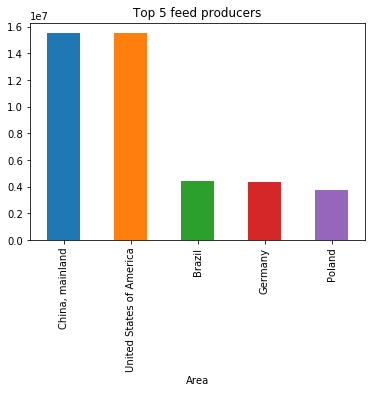

In [5]:
Total.xs('Feed', level='Element').sum(axis=1).nlargest(5).plot.bar(title = "Top 5 feed producers")

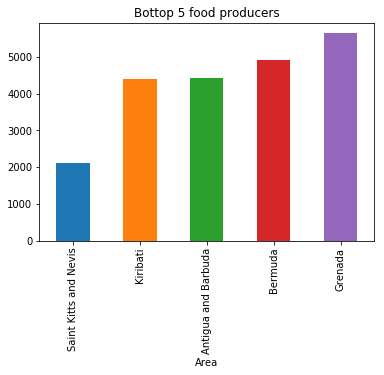

In [6]:
# Bottom 5 food producers

Total.xs('Food', level='Element').sum(axis=1).nsmallest(5).plot.bar(title = "Bottop 5 food producers")

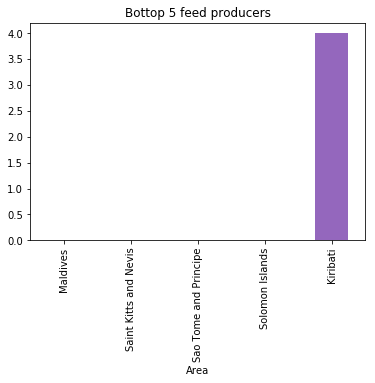

In [7]:
# Bottom 5 food producers

Total.xs('Feed', level='Element').sum(axis=1).nsmallest(5).plot.bar(title = "Bottop 5 feed producers")

# Objective 2: Plot world food and feed production per year as a function of year. 

# Dealing with missing values (A) Drop all rows with any one missing value

In [8]:
Total_dropna_all = FAO_1.dropna(axis = 0, how='any')
Total_dropna_all = Total_dropna_all.groupby('Area').sum()

# Dealing with missing values (B) Fit to data and transform missing values

In [9]:
from sklearn.preprocessing import Imputer

# Indetify columns with missing values
FAO_1.isnull().sum() #--> FAO_1.columns[10:-2]
#Create numpy array to be imported

FAO_2btransformed = FAO_1[FAO_1.columns[10:]].values
FAO_transformed = Imputer(axis=0).fit_transform(FAO_2btransformed)
test = pd.DataFrame(FAO_transformed)
FAO_2 = FAO_1.copy(deep = True)
FAO_2.iloc[:,10:] = FAO_transformed
#print(FAO_2.isnull().sum())

FAO_2.isnull().sum()

Area Abbreviation    0
Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Unit                 0
latitude             0
longitude            0
Y1961                0
Y1962                0
Y1963                0
Y1964                0
Y1965                0
Y1966                0
Y1967                0
Y1968                0
Y1969                0
Y1970                0
Y1971                0
Y1972                0
Y1973                0
Y1974                0
Y1975                0
Y1976                0
Y1977                0
Y1978                0
Y1979                0
Y1980                0
                    ..
Y1984                0
Y1985                0
Y1986                0
Y1987                0
Y1988                0
Y1989                0
Y1990                0
Y1991                0
Y1992                0
Y1993                0
Y1994                0
Y1995                0
Y1996      

# World food and feed production per year: Comparison of raw data, data with missing values removed and transformed
#No. of missing values and number of zeros in original dataset are shown for reference

NameError: name 'Total_transformed' is not defined

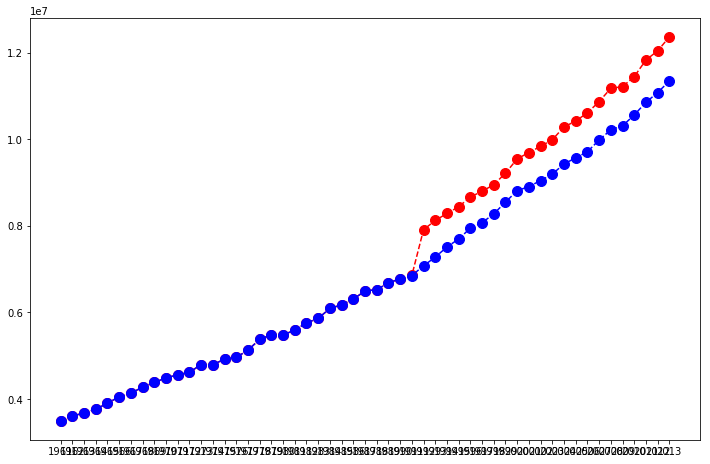

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

matplotlib.rcParams.update({'font.size': 10})

x = Total.columns

fig = plt.figure(1, figsize= (12,12))
gridspec.GridSpec(3,1)
plt.subplot2grid((3,1), (0,0),  rowspan=2, colspan =2)
plt.plot(x,Total.sum(axis=0), markersize = 10, color = 'red', marker = 'o',linestyle = '--')
plt.plot(x,Total_dropna_all.iloc[:,5:].sum(axis=0), markersize = 10, color = 'blue', marker = 'o',linestyle = '--')
plt.plot(x,Total_transformed.sum()[5:], markersize = 10, color = 'g', marker = 'o',linestyle = '--')
plt.ylabel("Annual world food production in 1000 Tonnes", fontsize = 20)

FAO_null_series = FAO_1.isnull().sum() #No. of NANs in original data set
plt.subplot2grid((3,1), (2,0))
plt.plot(x,FAO_null_series[10:], markersize = 10, color = 'green', marker = 'o',linestyle = '--')

FAO_zero_series = (FAO_1 == 0).sum() #No. of zeros in original data set
plt.plot(x,FAO_zero_series[10:], markersize = 10, color = 'blue', marker = 'o', linestyle = '--')

plt.ylabel("Entries in dataset", fontsize = 20, wrap = True)
plt.xlabel("Year", fontsize = 20)

plt.subplots_adjust(hspace=.0)
plt.annotate("No. of zeros", xy=(8,5700), color = 'blue', size = 25)
plt.annotate("No. of missing values", xy=(8,2200), color = 'green', size = 25)
plt.xticks(x[::5], x[::5])
 

In [ ]:
#How to fill NA? 
# constant value e.g. 0
# Mean, median, mode
#A value from another randomly selected record.
#A value estimated by another predictive model.

#For this dataset, we need to figure how to fill NA values
# this depends on the trend with country as a function of year. 

FAO_Ind_wheat = FAO_1[(FAO_1.Area == 'India') & (FAO_1.Element == 'Food') & (FAO_1.Item == 'Rice (Milled Equivalent)')]
y=FAO_Ind_wheat.iloc[:,10:].T
plt.plot(x,y, 'ro')
y.isnull().sum()

# Look at the data along rows. Fit the data. Predict values for missing values based on the fit. replace missing values with that value


# The world's food and feed production per annum increases linearly with year. How does this relate to world population per annum?
#Import new dataset that contains world population by countries and compare the data and perform correlation.
#World population dataset courtesy: Kaggle, https://www.kaggle.com/centurion1986/world-population

In [ ]:
#Plotting World food production

import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
#import matplotlib.ticker as ticker

matplotlib.rcParams.update({'font.size': 18, 'legend.fontsize':'large', 'figure.titlesize':'medium', 'font.family': 'Arial'})


x1 = Final_df.columns

fig, ax1 = plt.subplots(figsize = (15,15), sharex = True)
# Raw data
ax1.plot(x1,World_food_feed, markersize = 14, color = 'g', marker = 'o',linestyle = '--', mec = 'black', label = 'Raw data')
# NA's removed
ax1.plot(x,Total_dropna_all.iloc[:,5:].sum(axis=0), markersize = 14, color = 'c', marker = '>',linestyle = '--', mec = 'black', label = 'Removed missing values')
# NA's transformed
ax1.plot(x,Total_transformed.sum()[5:], markersize = 14, color = 'y', marker = 'p',linestyle = '--',mec = 'black', label = 'Replaced missing values')
ax1.set_xlabel("Year")
ax1.set_ylabel("Annual world food/feed production (1000 Tonnes)", color = 'black')
ax1.tick_params('y', color = 'black')
for axis in ['left', 'bottom', 'top']:
    ax1.spines[axis].set_linewidth(3)
ax1.legend()


ax2 = ax1.twinx()
#Annual world population
ax2.plot(x1,World_population, markersize = 14, color = 'r', marker = '>',linestyle = '--', mec = 'black' , label = 'World Annual population')
ax2.set_ylabel("Annual world population", color = 'red')
ax2.tick_params('y', color = 'red')
ax1.set_xticks(list(x1[::5]))
ax2.spines['right'].set_color('red')
ax2.spines['right'].set_linewidth(3)
ax1.xaxis.set_ticklabels(list(x1[::5]))


# Annual food and feed production comparison with population

In [ ]:
#Import population dataset and compare with food and feed production

world_pop = pd.read_csv("WorldPopulation.csv", encoding = "ISO-8859-1")
world_pop = world_pop.rename(columns = {'\x95ÈÀ"Country"':'Area', 'Indicator Name': 'Element'}) # Renaming column name
world_pop.set_index(['Area', 'Element'], inplace = True)

#World pop dataset has 217 countries while Total dataset has only 174 countries
#Append population data from world pop dataset to Total dataset

Population_Filter = world_pop.sort_index()
Population_Filter = Population_Filter.iloc[:,3:-3]

cmn_index = (Total.index.levels[0]) & (world_pop.index.levels[0])
Food_pop = Total.append(Population_Filter.loc[list(cmn_index)])
Food_pop.sort_index(inplace=True)


In [ ]:
#Plot total food, feed and population as a function of years

matplotlib.rcParams.update({'font.size': 18, 'legend.fontsize':'large', 'figure.titlesize':'medium', 'font.family': 'Arial'})


x2 = Food_pop.columns

fig, ax1 = plt.subplots(figsize = (15,15), sharex = True)
# Total food
ax1.plot(x2,Food_pop.xs('Food', level='Element').sum(axis=0), markersize = 14, color = 'g', marker = 'o',linestyle = '--', mec = 'black', label = 'Food')
# Total feed
ax1.plot(x2,Food_pop.xs('Feed', level='Element').sum(axis=0), markersize = 14, color = 'c', marker = '>',linestyle = '--', mec = 'black', label = 'Feed')
ax1.set_xlabel("Year")
ax1.set_ylabel("Annual world food/feed production (1000 Tonnes)", color = 'black')
ax1.tick_params('y', color = 'black')
for axis in ['left', 'bottom', 'top']:
    ax1.spines[axis].set_linewidth(3)
ax1.legend()


ax2 = ax1.twinx()
#Annual world population
ax2.plot(x2,Food_pop.xs('Population, total', level='Element').sum(axis=0), markersize = 14, color = 'r', marker = '>',linestyle = '--', mec = 'black' , label = 'World Annual population')
ax2.set_ylabel("Annual world population", color = 'red')
ax2.tick_params('y', color = 'red')
ax1.set_xticks(list(x1[::5]))
ax2.spines['right'].set_color('red')
ax2.spines['right'].set_linewidth(3)
ax1.xaxis.set_ticklabels(list(x1[::5]))

Correlation between population and total food production

In [ ]:
#Missing values in FAO_2 is transformed. FAO_2 will be used for this analysis

Transformed_total = FAO_2.copy(deep = True)
Transformed_total = Transformed_total.groupby(['Area','Element']).sum()
Transformed_total = Transformed_total.loc[:, 'Y1961':]
Transformed_total.rename(columns=lambda x: x[1:], inplace=True) #drop 'y" in col names

#World pop dataset has 217 countries while Total dataset has only 174 countries
#Append population data from world pop dataset to Total dataset

ind = list(Transformed_total.index.levels[0] & world_pop.index.levels[0])

Food_pop_transformed=Transformed_total.append(Population_Filter.loc[ind])
Food_pop_transformed.sort_index(inplace = True)

# Plot

x3 = Food_pop_transformed.columns

fig, ax1 = plt.subplots(figsize = (15,15), sharex = True)

# Total raw food
ax1.plot(x3,Food_pop.xs('Food', level='Element').sum(axis=0), markersize = 14, color = 'g', marker = 'o',linestyle = '--', mec = 'black', label = 'Food - Raw data', alpha = 0.5)
# Total raw feed
ax1.plot(x3,Food_pop.xs('Feed', level='Element').sum(axis=0), markersize = 14, color = 'c', marker = '>',linestyle = '--', mec = 'black', label = 'Feed - Raw data', alpha = 0.5)
# Total transformed food 
ax1.plot(x3,Food_pop_transformed.xs('Food', level='Element').sum(axis=0), markersize = 14, color = 'g', marker = 'o',linestyle = '--', mec = 'black', label = 'Food - Transformed data')
# Total transformed feed
ax1.plot(x3,Food_pop_transformed.xs('Feed', level='Element').sum(axis=0), markersize = 14, color = 'c', marker = '>',linestyle = '--', mec = 'black', label = 'Feed - Transformed data')
ax1.set_xlabel("Year")
ax1.set_ylabel("Annual world food/feed production (1000 Tonnes)", color = 'black')
ax1.tick_params('y', color = 'black')
for axis in ['left', 'bottom', 'top']:
    ax1.spines[axis].set_linewidth(3)
ax1.legend()


ax2 = ax1.twinx()
#Annual world population
ax2.plot(x3,Food_pop_transformed.xs('Population, total', level='Element').sum(axis=0), markersize = 14, color = 'r', marker = '>',linestyle = '--', mec = 'black' , label = 'World Annual population')
ax2.set_ylabel("Annual world population", color = 'red')
ax2.tick_params('y', color = 'red')
ax1.set_xticks(list(x1[::5]))
ax2.spines['right'].set_color('red')
ax2.spines['right'].set_linewidth(3)
ax1.xaxis.set_ticklabels(list(x1[::5]))


In [ ]:
#Pop_Filter= world_pop.loc[world_pop.index.levels[0] & Total.index.levels[0]] #World population dataset has more countried than in food/feed dataset.
#Pop_Filter
# Pop_Filter['Element'] = 'Population'
# Pop_Filter
#set multiindex for world population
# Pop_Filter.reset_index('Area', inplace = True)
# Pop_Filter.set_index(['Area','Type'],inplace=True)



#append population data to Total dataframe

# Final_df = Total.append(Pop_Filter[Pop_Filter.columns & Total.columns])

# #Set multiindex - Area and Type in total dataframe
# Final_df.reset_index('Area', inplace = True)
# Final_df.set_index(['Area','Type'],inplace=True)
# Final_df.sort_index(level = 'Area')


# World_food_feed = Final_df.groupby('Type').sum(axis=1).iloc[0] #raw data - (food + feed) per annum
# World_population = Final_df.groupby('Type').sum(axis=1).iloc[1]


In [ ]:
#Import population dataset and compare with food and feed production

#world_pop = pd.read_csv("WorldPopulation.csv", encoding = "ISO-8859-1")
#Dataset courtesy: Kaggle, https://www.kaggle.com/centurion1986/world-population

#Understanding dataset
#world_pop.head()
#set(world_pop['Indicator Code']) #col 'Indicator Code' has same value 'SP.POP.TOTL' throughout dataframe
#set(world_pop['Indicator Name']) #col 'Indicator Code' has same value 'Population, total' throughout dataframe
#print(world_pop.describe())

#List of countries in population dataset
#world_pop_ctry = set(world_pop['Country Code'])
#len(world_pop_ctry)
#List of countries in food and feed dataset
# food_feed_ctry = set(FAO_1['Area Abbreviation'])
# len(food_feed_ctry)

Is there any correlation between total food+feed and population? 

In [ ]:
Food_feed_series = Food_pop_transformed.xs('Feed', level = 'Element') + Food_pop_transformed.xs('Feed', level = 'Element')
Food_feed_series.sum()
Pop_series = Food_pop_transformed.xs('Population, total', level = 'Element').sum()
Pop_series.corr(Food_feed_series.sum())


Is there any correlation between total food and population? 

In [ ]:
Pop_series = Food_pop_transformed.xs('Population, total', level = 'Element').sum()
Pop_series.corr(Food_pop_transformed.xs('Food', level = 'Element').sum())

In [ ]:
correlation_matrix = FAO_1.corr()
import seaborn as sns
sns.distplot(world_pop['1960'].dropna())

#world_pop['1960'].plot(kind = 'density')

#Food_pop.xs('Population, total', level='Element').sum().plot(kind = 'density')
#Food_pop_transformed.count()

#Food_pop.xs('Food', level='Element').sum()

In [ ]:
min(world_pop['1960'])

In [ ]:
max(world_pop['1960']) 

In [ ]:
a = pd.Series(range(100))

In [ ]:
a.plot(kind='density')

In [ ]:

plt.plot(world_pop.columns[2:], world_pop.loc['Sri Lanka','1960':].T, marker = 'o')

In [ ]:
import math
help(math)

In [ ]:
list1.count(2)


In [ ]:
72*72

In [ ]:
86123373/500